#Installing PySCF

In [ ]:
pip install pyscf

#H-atom input file

In [ ]:
from pyscf import gto, scf

# Define the molecule (Hydrogen atom)
mol = gto.Mole()
mol.atom = 'H 0 0 0'  # Hydrogen at the origin
mol.basis = 'STO-3G'   # Minimal basis set
mol.spin = 1           # Spin-polarized (unpaired electron)
mol.build()

# Perform Restricted Open-Shell Hartree-Fock (ROHF) calculation
mf = scf.ROHF(mol)
mf.kernel()  # Run the calculation

# Print results
print(f"Total Energy for Hydrogen Atom with STO-3G (Hartree): {mf.e_tot}")

converged SCF energy = -0.466581849557275
Total Energy for Hydrogen Atom with STO-3G (Hartree): -0.46658184955727533


#Helium-input file

## a)Hartree-Fock/STO-3G for He

In [ ]:
from pyscf import gto, scf

# Define the molecule (Helium atom)
mol = gto.Mole()
mol.atom = 'He 0 0 0'  # Helium at the origin
mol.basis = 'sto-3G'   # Minimal basis set
mol.charge = 0         # Neutral helium
mol.spin = 0           # Closed-shell (all electrons paired)
mol.build()

# Perform Restricted Hartree-Fock (RHF) calculation
mf = scf.RHF(mol)
mf.kernel()  # Run the calculation

# Print results
print("\n--- Hartree-Fock (STO-3G) Results for Helium Atom ---")
print(f"Total Energy (Hartree): {mf.e_tot}")

converged SCF energy = -2.80778395753997

--- Hartree-Fock (STO-3G) Results for Helium Atom ---
Total Energy (Hartree): -2.807783957539974


##b)Full Configuration Interaction/cc-pV5Z for He

In [ ]:
from pyscf import gto, scf, fci

# Define the molecule (Helium atom)
mol = gto.Mole()
mol.atom = 'He 0 0 0'  # Helium at the origin
mol.basis = 'cc-pV5Z'    # Minimal basis set
mol.charge = 0          # Neutral helium
mol.spin = 0            # Closed-shell (all electrons paired)
mol.build()

# Run Hartree-Fock (HF) first to get MOs
mf = scf.RHF(mol)
mf.kernel()

# Perform Full CI (FCI) calculation
cisolver = fci.FCI(mol, mf.mo_coeff)
fci_energy, fci_vec = cisolver.kernel()

# Print results
print("\n--- FCI/STO-3G Results for Helium Atom ---")
print(f"HF Energy (STO-3G): {mf.e_tot}")
print(f"FCI Energy (STO-3G): {fci_energy}")

converged SCF energy = -2.86162483458191

--- FCI/STO-3G Results for Helium Atom ---
HF Energy (STO-3G): -2.861624834581909
FCI Energy (STO-3G): -2.9031518840489294


#H2 input file

##a)Hartree-Fock/STO-3G for H2

In [ ]:
# Define molecular system
mol = gto.Mole()
mol.atom = '''
H 0 0 0
H 0 0 1.4
'''
mol.basis = 'sto-3g'
mol.charge = 0
mol.spin = 0  # singlet
mol.build()

# Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Print results
print("\nHF/STO-3G calculation for H2 at R=1.4 bohr")
print("Total Energy (Hartree):", mf.e_tot)

converged SCF energy = -0.941480654707799

HF/STO-3G calculation for H2 at R=1.4 bohr
Total Energy (Hartree): -0.9414806547077987


##b)Full Configuration Interaction/cc-pV5Z for H2

In [ ]:
# Define molecular system
mol = gto.Mole()
mol.atom = '''
H 0 0 0.000
H 0 0 1.400
'''
mol.basis = 'cc-pVQZ'  # Very large basis set for high accuracy
mol.charge = 0
mol.spin = 0  # singlet
mol.unit = 'Bohr'
mol.build()

# Perform Hartree-Fock calculation first
mf = scf.RHF(mol)
mf.kernel()

# Perform Full CI calculation
cisolver = fci.FCI(mol, mf.mo_coeff)
fci_energy = cisolver.kernel()[0]

# Print results
print("\nFCI/cc-pV5Z calculation for H2 at R=1.4 bohr")
print("HF Energy (Hartree):", mf.e_tot)
print("FCI Energy (Hartree):", fci_energy)

converged SCF energy = -1.13345903359425

FCI/cc-pV5Z calculation for H2 at R=1.4 bohr
HF Energy (Hartree): -1.133459033594253
FCI Energy (Hartree): -1.1737957922494915


#2nd Quantization Hamiltonian

In [ ]:
!pip install pyscf==2.6.2 qiskit==1.1.1 qiskit-nature==0.7.2 pylatexenc

In [ ]:
import numpy as np
import pandas as pd

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import UCC, HartreeFock
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import QuantumCircuit

In [ ]:
def UCCSD_decompose(ansatz):

    N_iter = len(ansatz.decompose(reps=2).data)
    num_qubit = ansatz.num_qubits
    for i in range(N_iter):
        new_qc = QuantumCircuit(num_qubit)
        instruction = ansatz.decompose(reps=2).data[i]
        name = ansatz.decompose(reps=2).data[i][0].name
        print(i, name)
        new_qc.append(instruction)
        display(new_qc.decompose().draw('mpl'))

In [ ]:
H2_driver = PySCFDriver(
        atom='H 0 0 0; H 0 0 1.4',
        basis='sto6g',
        charge=0,
        spin=0,
        unit=DistanceUnit.BOHR,
    )

In [ ]:
problem = H2_driver.run()
hamiltonian = problem.hamiltonian
second_q_op = hamiltonian.second_q_op()
enuc = hamiltonian.nuclear_repulsion_energy

print(second_q_op,'\n')

Fermionic Operator
number spin orbitals=4, number terms=36
  0.3372684670688341 * ( +_0 +_0 -_0 -_0 )
+ 0.332118063835212 * ( +_0 +_1 -_1 -_0 )
+ 0.3372684670688341 * ( +_0 +_2 -_2 -_0 )
+ 0.332118063835212 * ( +_0 +_3 -_3 -_0 )
+ 0.09077270813615765 * ( +_0 +_0 -_1 -_1 )
+ 0.09077270813615765 * ( +_0 +_1 -_0 -_1 )
+ 0.09077270813615765 * ( +_0 +_2 -_3 -_1 )
+ 0.09077270813615765 * ( +_0 +_3 -_2 -_1 )
+ 0.09077270813615765 * ( +_1 +_0 -_1 -_0 )
+ 0.09077270813615765 * ( +_1 +_1 -_0 -_0 )
+ 0.09077270813615765 * ( +_1 +_2 -_3 -_0 )
+ 0.09077270813615765 * ( +_1 +_3 -_2 -_0 )
+ 0.332118063835212 * ( +_1 +_0 -_0 -_1 )
+ 0.3495366144941802 * ( +_1 +_1 -_1 -_1 )
+ 0.332118063835212 * ( +_1 +_2 -_2 -_1 )
+ 0.3495366144941802 * ( +_1 +_3 -_3 -_1 )
+ 0.3372684670688341 * ( +_2 +_0 -_0 -_2 )
+ 0.332118063835212 * ( +_2 +_1 -_1 -_2 )
+ 0.3372684670688341 * ( +_2 +_2 -_2 -_2 )
+ 0.332118063835212 * ( +_2 +_3 -_3 -_2 )
+ 0.09077270813615765 * ( +_2 +_0 -_1 -_3 )
+ 0.09077270813615765 * ( +_2 +_1 -

#Qubit Hamiltonian

In [ ]:
num_spatial_orbitals = problem.num_spatial_orbitals
num_particles = problem._num_particles
qubit = JordanWignerMapper().map(second_q_ops = second_q_op)
print(qubit.to_list(array=True))

[('IIII', -0.82007165+0.j) ('IIIZ',  0.17317081+0.j)
 ('IIZI', -0.22156797+0.j) ('IIZZ',  0.12067268+0.j)
 ('IZII',  0.17317081+0.j) ('IZIZ',  0.16863423+0.j)
 ('ZIII', -0.22156797+0.j) ('ZIIZ',  0.16605903+0.j)
 ('YYYY',  0.04538635+0.j) ('XXYY',  0.04538635+0.j)
 ('YYXX',  0.04538635+0.j) ('XXXX',  0.04538635+0.j)
 ('IZZI',  0.16605903+0.j) ('ZIZI',  0.17476831+0.j)
 ('ZZII',  0.12067268+0.j)]


#Classical/Numpy solver

In [ ]:
numpy_solver = NumPyMinimumEigensolver()
np_result = numpy_solver.compute_minimum_eigenvalue(operator=qubit)
E_np = np_result.eigenvalue.real
E_total = E_np + enuc

print('Numpy Energy:',E_total)

Numpy Energy: -1.1459292449765162


#Hardware-Efficient Ansatz

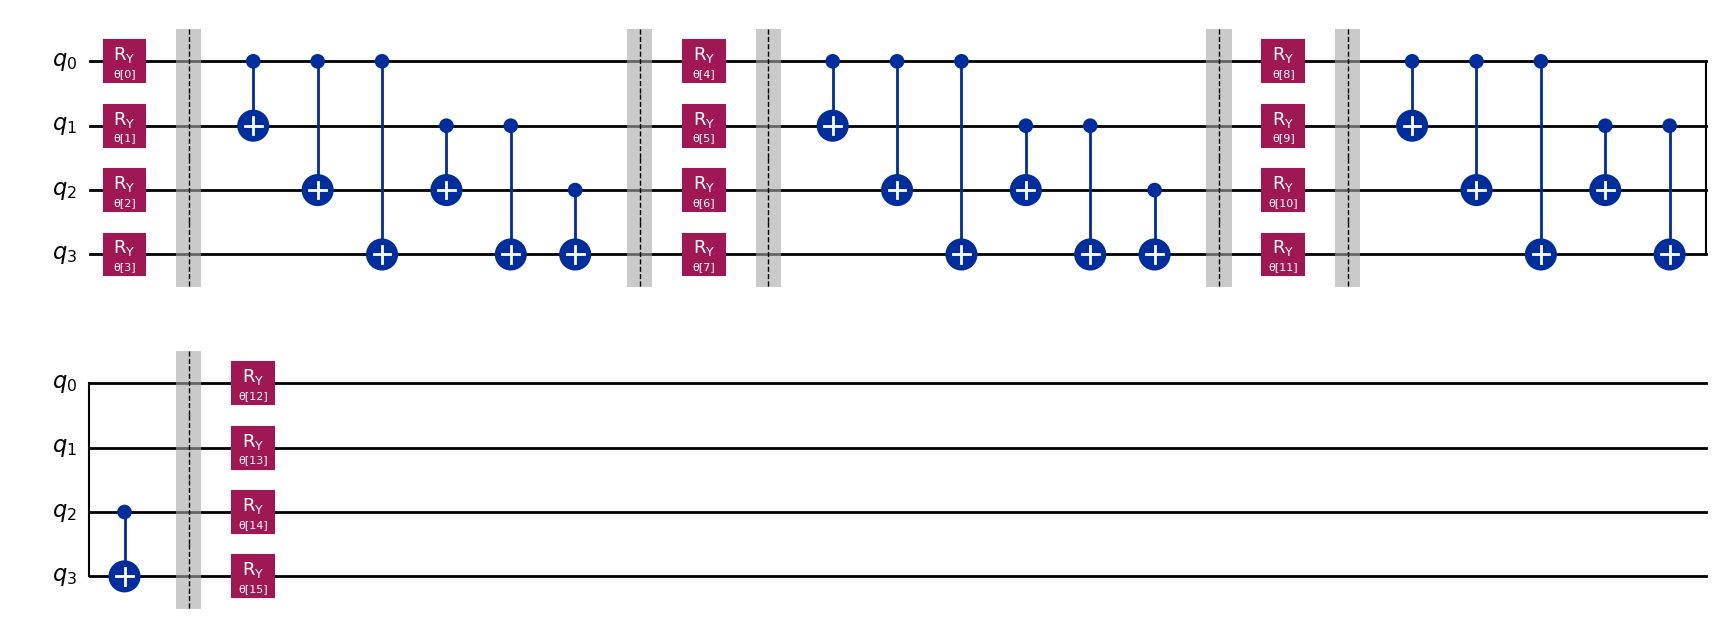

HEA Energy: -1.1442029647240126
[ 6.28705757 -2.88115389  3.70073067 -4.83741541  1.80023141  3.28257936
 -0.28466802 -4.91159845 -2.86608562  3.44066924  4.88582607 -4.55806131
  1.7908246  -0.06876524 -4.70934535 -5.55990237]


In [ ]:
ansatz_HEA = TwoLocal(
    rotation_blocks=['ry'],
    entanglement_blocks=['cx'],
    entanglement='full',
    reps=3,
    parameter_prefix="θ",
    insert_barriers=True)

vqe_HEA = VQE(Estimator(), ansatz_HEA, COBYLA())
res_HEA = vqe_HEA.compute_minimum_eigenvalue(operator=qubit)
E_HEA = res_HEA.optimal_value + enuc

display(ansatz_HEA.decompose().draw('mpl'))

print('HEA Energy:',E_HEA)
print(res_HEA._optimal_point)

#UCCSD

In [ ]:
ansatz_UCCSD = UCC(
        num_spatial_orbitals,
        num_particles,
        'sd',
        JordanWignerMapper(),
        initial_state=HartreeFock(
            num_spatial_orbitals,
            num_particles,JordanWignerMapper()))

vqe_UCCSD = VQE(Estimator(), ansatz_UCCSD, COBYLA())
res_UCCSD = vqe_UCCSD.compute_minimum_eigenvalue(operator=qubit)
E_UCCSD = res_UCCSD.optimal_value + enuc

print('UCCSD Energy :',E_UCCSD)

UCCSD Energy : -1.1459292341398055


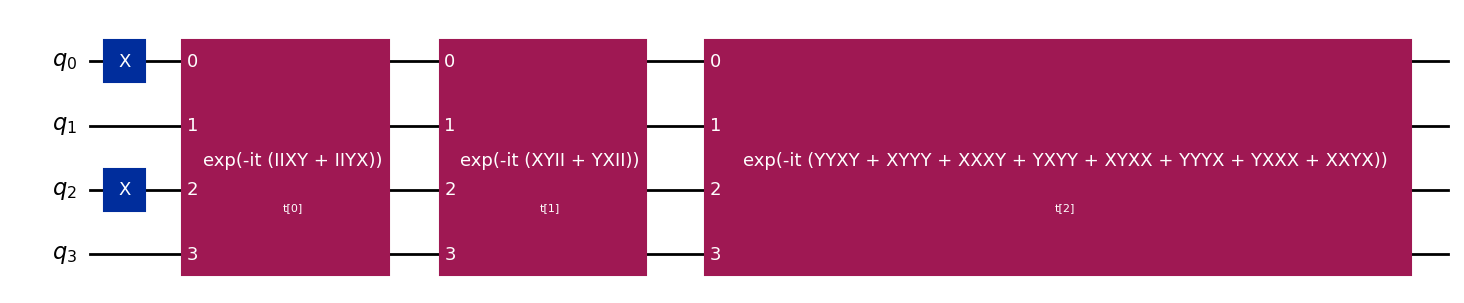

In [ ]:
ansatz_UCCSD.decompose().draw('mpl')

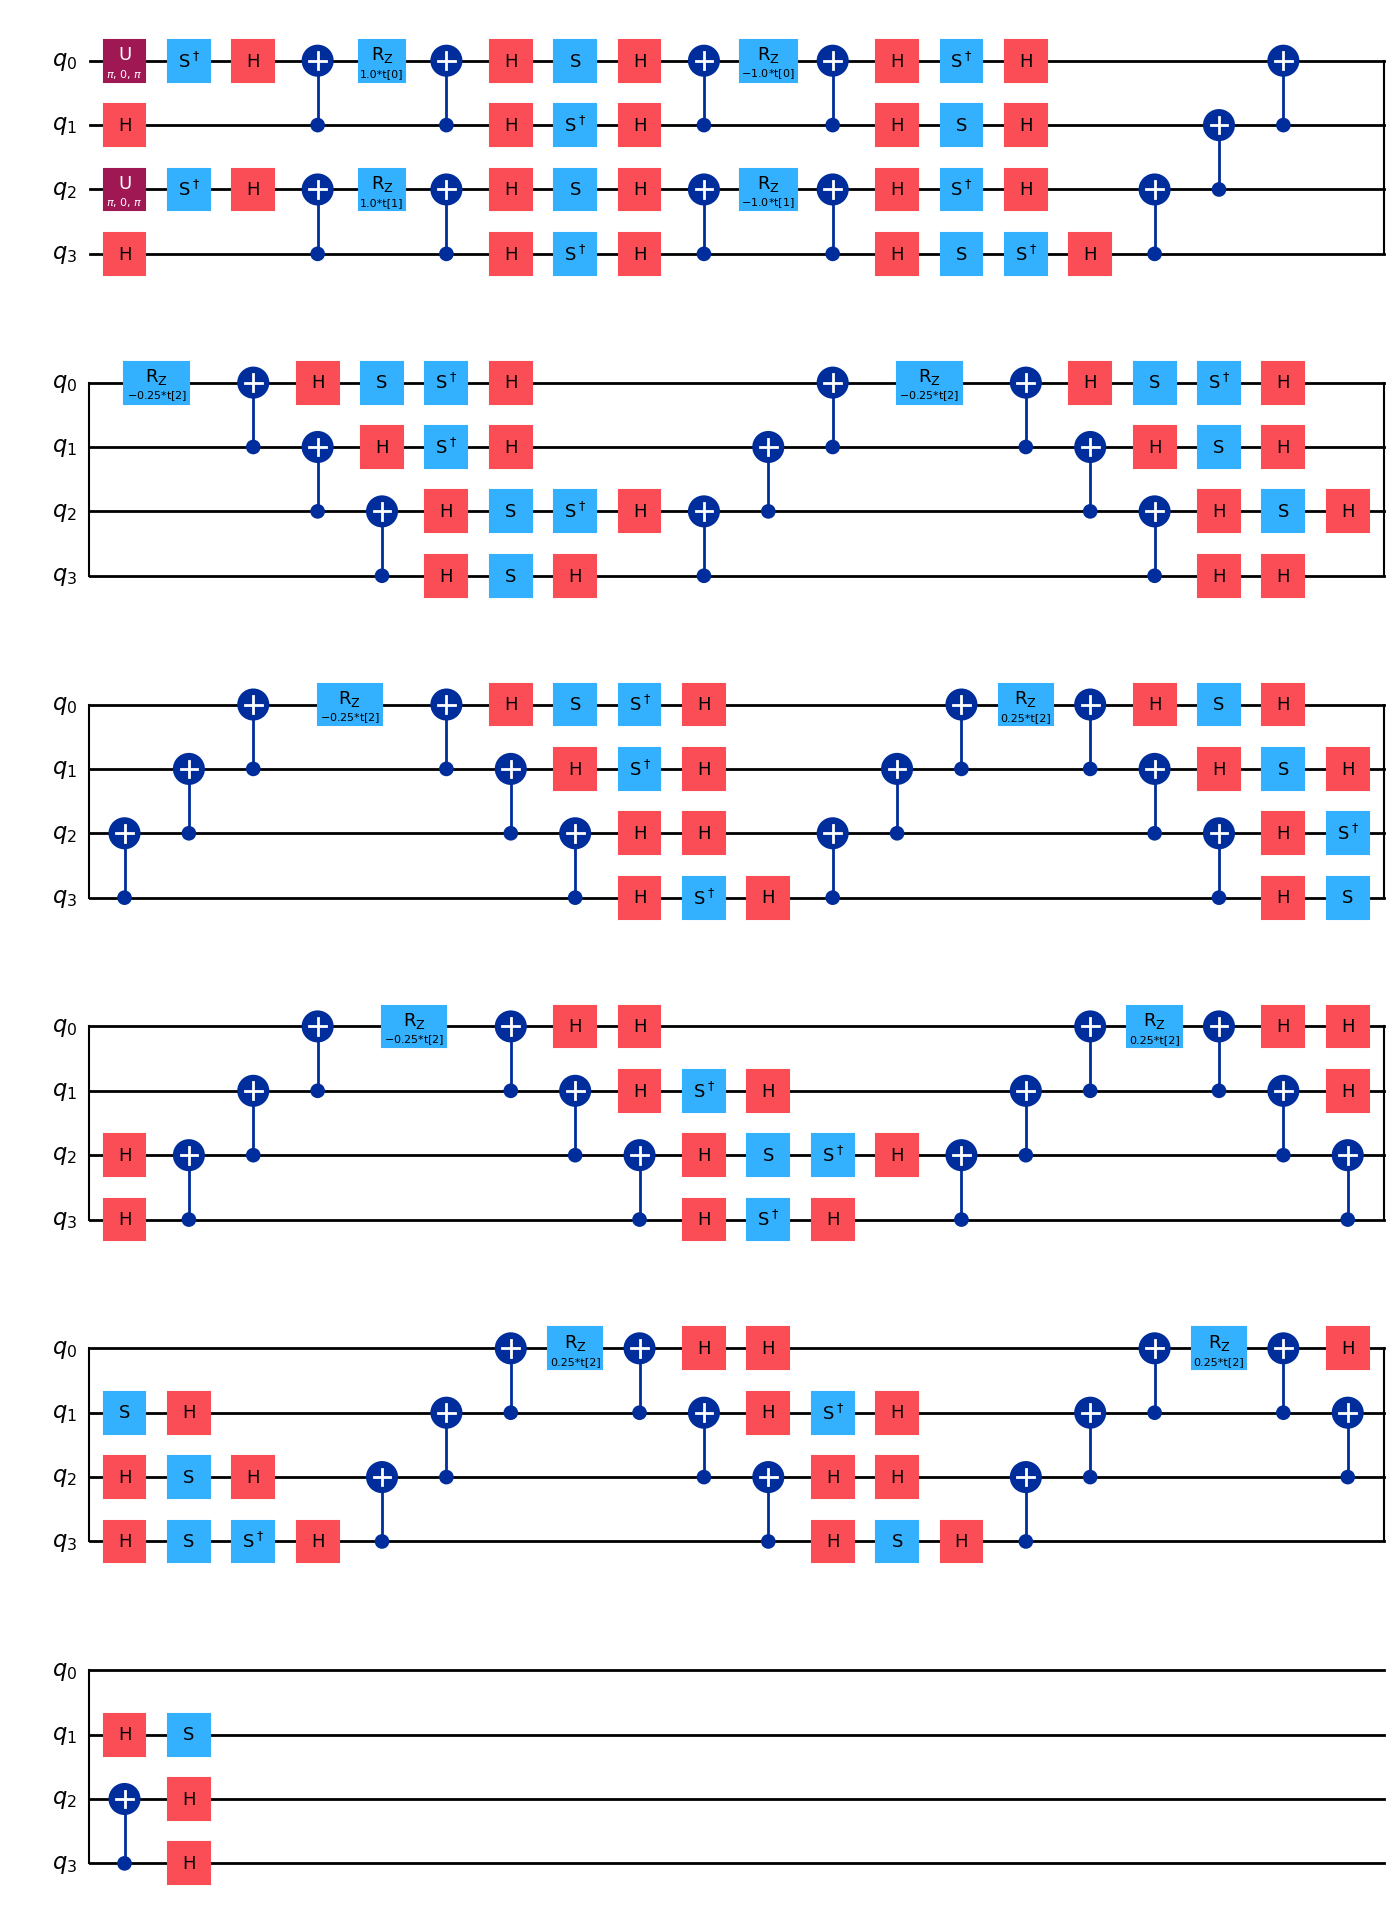

In [ ]:
ansatz_UCCSD.decompose(reps=3).draw('mpl', fold=20)

#Comparison of Results

In [ ]:
method_list = ['Numpy','HEA','UCCSD']
res_list = [E_total,E_HEA,E_UCCSD]

data = {
    'Method' : method_list,
    'Result' : res_list,
}

df = pd.DataFrame(data)
df.round(6)

,Method,Result
0,Numpy,-1.145929
1,HEA,-1.144203
2,UCCSD,-1.145929


In [ ]:
import qiskit, qiskit_nature
txt = '{:15} : {:}'
print('Library Information')
print(txt.format('Numpy', np.__version__))
print(txt.format('Qiskit', qiskit.__version__))
print(txt.format('Qiskit Nature', qiskit_nature.__version__))

Library Information
Numpy           : 2.0.2
Qiskit          : 1.1.1
Qiskit Nature   : 0.7.2
